In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define the path to your dataset
train_dir = r'C:\Users\chain\Downloads\brain tumour\Training'
test_dir = r'C:\Users\chain\Downloads\brain tumour\Testing'

# Define parameters
batch_size = 32
img_height, img_width = 150, 150
epochs = 10


In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Define class subfolders
classes = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',  
    classes=classes
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    classes=classes
)


Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))  

In [9]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  
              metrics=['accuracy'])

In [10]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

Epoch 1/10
89/89 [==============================] - 61s 666ms/step - loss: 1.1320 - accuracy: 0.4951 - val_loss: 1.9871 - val_accuracy: 0.3542
Epoch 2/10
89/89 [==============================] - 53s 595ms/step - loss: 0.7815 - accuracy: 0.6660 - val_loss: 2.5391 - val_accuracy: 0.3698
Epoch 3/10
89/89 [==============================] - 56s 631ms/step - loss: 0.6463 - accuracy: 0.7329 - val_loss: 2.6701 - val_accuracy: 0.3932
Epoch 4/10
89/89 [==============================] - 54s 608ms/step - loss: 0.5450 - accuracy: 0.7766 - val_loss: 3.0157 - val_accuracy: 0.4453
Epoch 5/10
89/89 [==============================] - 59s 662ms/step - loss: 0.4886 - accuracy: 0.8030 - val_loss: 3.4003 - val_accuracy: 0.4844
Epoch 6/10
89/89 [==============================] - 55s 612ms/step - loss: 0.4462 - accuracy: 0.8147 - val_loss: 3.6256 - val_accuracy: 0.4974
Epoch 7/10
89/89 [==============================] - 53s 590ms/step - loss: 0.3936 - accuracy: 0.8365 - val_loss: 2.7219 - val_accuracy: 0.5000

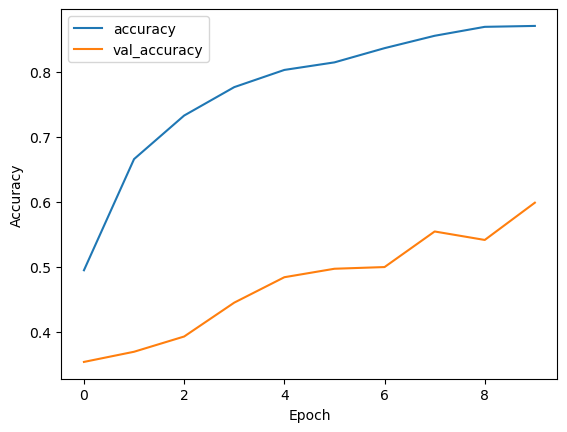

In [11]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [12]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

13/13 [==============================] - 2s 167ms/step - loss: 2.2779 - accuracy: 0.5964
Test accuracy: 0.596446692943573


In [17]:
import os
import random
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model
#model = tf.keras.models.load_model('pneumonia_classifier.h5')  # Replace with the actual model file path

# Define the path to the directory containing class folders
parent_dir = test_dir  # Replace with the actual parent directory path

# Get a list of all subdirectories (each subdirectory corresponds to a class)
class_folders = [d for d in os.listdir(parent_dir) if os.path.isdir(os.path.join(parent_dir, d))]

# Choose a random class folder
random_class_folder = random.choice(class_folders)

# Construct the full path to a random image within the selected class folder
image_dir = os.path.join(parent_dir, random_class_folder)
image_files = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]
random_image_file = random.choice(image_files)
image_path = os.path.join(image_dir, random_image_file)

# Use the class folder name as the ground truth class
ground_truth_class = random_class_folder

# Load and preprocess the random image
img = image.load_img(image_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize the pixel values

# Make a prediction
predictions = model.predict(img_array)

# Get the predicted class index
predicted_class_index = np.argmax(predictions, axis=1)[0]

# Print the ground truth and predicted classes
classes = class_folders  # Use the folder names as class names
predicted_class = classes[predicted_class_index]

print(f"Random Image: {random_image_file}")
print(f"Ground Truth Class: {ground_truth_class}")
print(f"Predicted Class: {predicted_class}")

# Check if the predicted class is correct
is_correct = ground_truth_class == predicted_class
print(f"Is Correct Prediction? {'Yes' if is_correct else 'No'}")


1/1 [==============================] - 0s 38ms/step
Random Image: image(62).jpg
Ground Truth Class: meningioma_tumor
Predicted Class: meningioma_tumor
Is Correct Prediction? Yes
